# 📦 Project: The Shipping Crisis (Saudi Retail Case Study)
## 📋 The Scenario
You have been hired by a major Saudi-based e-commerce platform. Management has noticed a significant decline in customer satisfaction scores. Initial reports suggest that a massive number of packages are not reaching customers on time.

**The Management's Question:**
*"We are losing money and customers. We need to know: Is this a logistics problem (Mode of Shipment), a product problem (Weight/Cost), or a strategy problem (Discounts/Priority)? Find the root cause and build a system to save our customers."*

## Phase 1: Data Understanding
In this phase, explore the `Saudi_Retail_Logistics_Data.csv` to find out **why** delays are happening.

* **Step 1.1:** Load the dataset.
* **Step 1.2:** Perform statistical profiling (`.describe()`, `.info()`).
* **Step 1.3:** Create visualizations (Histograms/Scatter) to find the problem.

| Feature Name         | Type       | Description                                                                 | Values / Examples                               |
| :------------------- | :--------- | :-------------------------------------------------------------------------- | :--------------------------------------------- |
| Tracking_ID          | String     | A unique, encrypted alphanumeric identifier for each shipment.              | E3B0C44298FC, 1C2D3E4F5G6H                     |
| Warehouse_Zone       | Categorical| The regional distribution hub handling the order.                           | North_Hub, South_Hub, East_Hub, West_Hub, Central_Port |
| Mode_of_Shipment     | Categorical| The logistics method used to transport the product.                         | Premium_Air, Standard_Sea, Ground_Freight      |
| Customer_Inquiries   | Integer    | Number of times the customer contacted support regarding this order.        | 2, 3, 4, etc.                                  |
| Customer_Score       | Integer    | The rating provided by the customer to the store before shipment (1 is lowest, 5 is highest).            | 1, 2, 3, 4, 5                                  |
| Product_Cost_SAR     | Float      | The value of the item in Saudi Riyals (SAR).                                | 450.00, 1125.50, etc.                          |
| Previous_Orders      | Integer    | Number of successful orders this customer has placed previously.            | 0, 1, 2, 3, etc.                               |
| Product_Priority     | Categorical| The priority level assigned to the product for dispatch.                    | low, medium, high                              |
| Gender               | Categorical| The gender of the customer.                                                 | F, M                                           |
| Discount_offered     | Integer    | The discount amount applied to this specific order.                         | 1, 10, 65, etc.                                |
| Product_Weight_g     | Integer    | The weight of the package in grams.                                         | 1200, 4500, etc.                               |
| is_delayed           | Binary     | Target Variable: Indicates if the shipment arrived past the deadline.       | 1 (Delayed), 0 (On Time)                       |

In [1]:
# imports
from pathlib import Path
import pandas as pd
# load data
local_file = Path('Saudi_Retail_Logistics_Data.csv')

if not local_file.exists():
    print("Downloading data...")
    df = pd.read_csv('https://drive.google.com/uc?export=download&id=1vayY_XKPwe5lOaq0VNia22O4DkDVXmzv')
    df.to_csv(local_file, index=False)
else:
    print("Loading data from cache...")
    df = pd.read_csv(local_file)
df.head()

Loading data from cache...


,Tracking_ID,Warehouse_Zone,Mode_of_Shipment,Customer_Inquiries,Customer_Score,Product_Cost_SAR,Previous_Orders,Product_Priority,Gender,Discount_offered,Product_Weight_g,is_delayed
0,D66B138C54AB,West_Hub,Ground_Freight,4,1,978.75,2,medium,F,9,4158,0
1,8FF9538E65E6,Central_Port,Standard_Sea,3,3,607.50,2,low,F,26,1659,1
2,D098284FA376,South_Hub,Standard_Sea,3,2,828.75,2,medium,M,9,4466,0
3,9202E9FDFF40,West_Hub,Standard_Sea,3,5,588.75,4,medium,F,2,4640,0
4,16B30490A644,North_Hub,Premium_Air,2,5,1020.00,2,low,M,24,3638,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tracking_ID         8799 non-null   object 
 1   Warehouse_Zone      8799 non-null   object 
 2   Mode_of_Shipment    8799 non-null   object 
 3   Customer_Inquiries  8799 non-null   int64  
 4   Customer_Score      8799 non-null   int64  
 5   Product_Cost_SAR    8799 non-null   float64
 6   Previous_Orders     8799 non-null   int64  
 7   Product_Priority    8799 non-null   object 
 8   Gender              8799 non-null   object 
 9   Discount_offered    8799 non-null   int64  
 10  Product_Weight_g    8799 non-null   int64  
 11  is_delayed          8799 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 825.0+ KB


In [3]:
df.describe()

,Customer_Inquiries,Customer_Score,Product_Cost_SAR,Previous_Orders,Discount_offered,Product_Weight_g,is_delayed
count,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000
mean,4.049096,2.997386,788.363877,3.581998,13.366974,3631.227867,0.596659
std,1.138649,1.411194,180.192439,1.532722,16.147015,1634.180615,0.490596
min,2.000000,1.000000,360.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,637.500000,3.000000,4.000000,1838.000000,0.000000
50%,4.000000,3.000000,802.500000,3.000000,7.000000,4140.000000,1.000000
75%,5.000000,4.000000,941.250000,4.000000,10.000000,5045.000000,1.000000
max,7.000000,5.000000,1162.500000,10.000000,65.000000,7846.000000,1.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

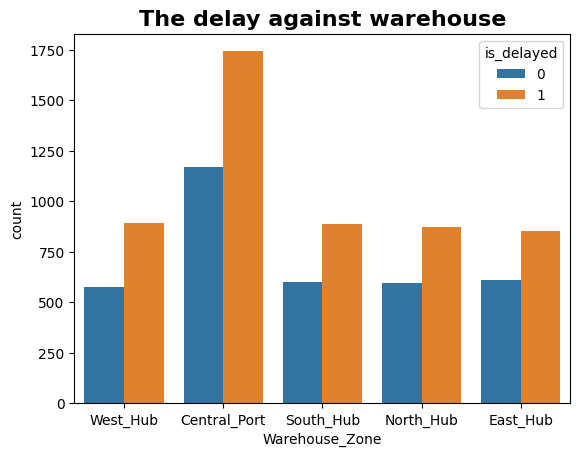

In [5]:
sns.countplot(data=df, x='Warehouse_Zone', hue='is_delayed')
plt.title('The delay against warehouse', fontsize=16, fontweight='bold')
plt.show()
# We tried different classification columns and observed the relationship

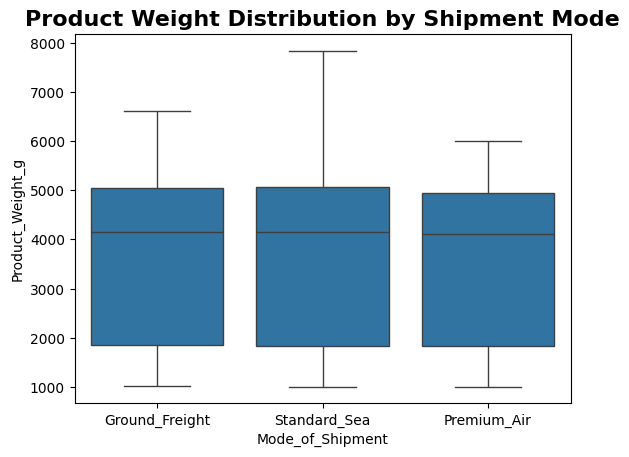

In [6]:
sns.boxplot(data=df, x='Mode_of_Shipment', y='Product_Weight_g')
plt.title('Product Weight Distribution by Shipment Mode', fontsize=16, fontweight='bold')
plt.show()

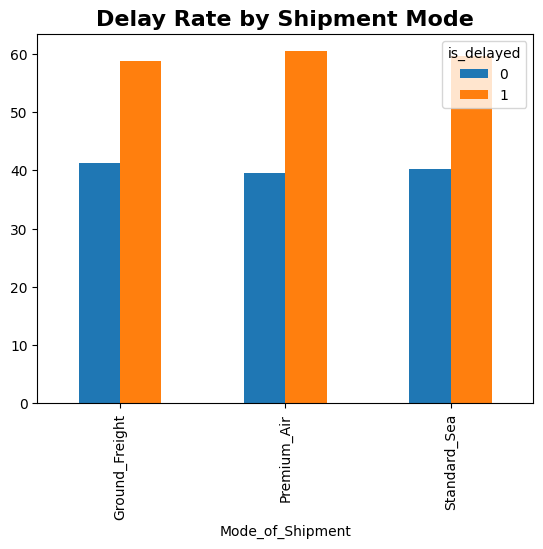

In [7]:
delivery_delayed = pd.crosstab(df['Mode_of_Shipment'], df['is_delayed'], normalize='index') * 100
delivery_delayed.plot(kind='bar')
plt.title('Delay Rate by Shipment Mode', fontsize=16, fontweight='bold')
plt.show()

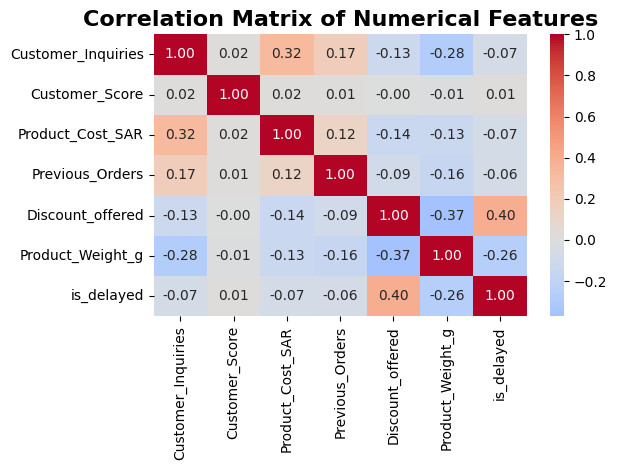

In [8]:
numerical_cols = ['Customer_Inquiries', 'Customer_Score', 'Product_Cost_SAR', 
                  'Previous_Orders', 'Discount_offered', 'Product_Weight_g', 'is_delayed']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

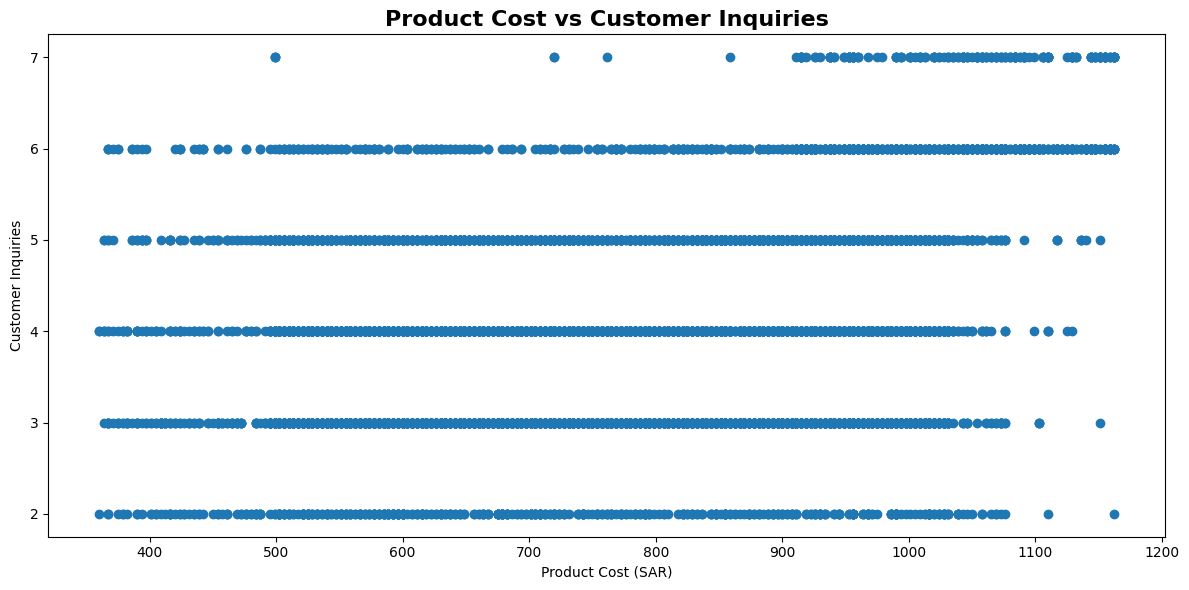

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Product_Cost_SAR'], df['Customer_Inquiries'])
plt.title('Product Cost vs Customer Inquiries', fontsize=16, fontweight='bold')
plt.xlabel('Product Cost (SAR)')
plt.ylabel('Customer Inquiries')
plt.tight_layout()
plt.show()

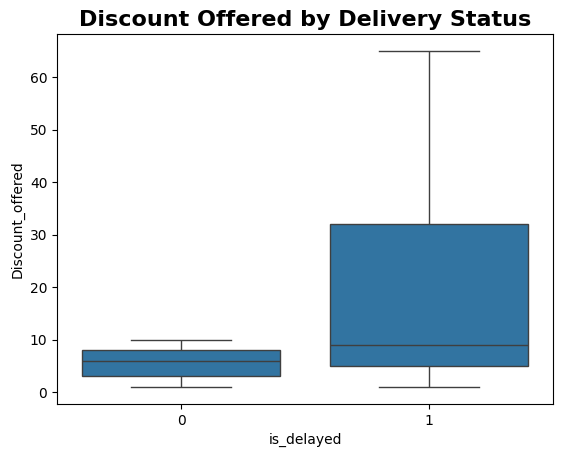

In [10]:
sns.boxplot(data=df, x='is_delayed', y='Discount_offered')
plt.title('Discount Offered by Delivery Status', fontsize=16, fontweight='bold')
plt.show()

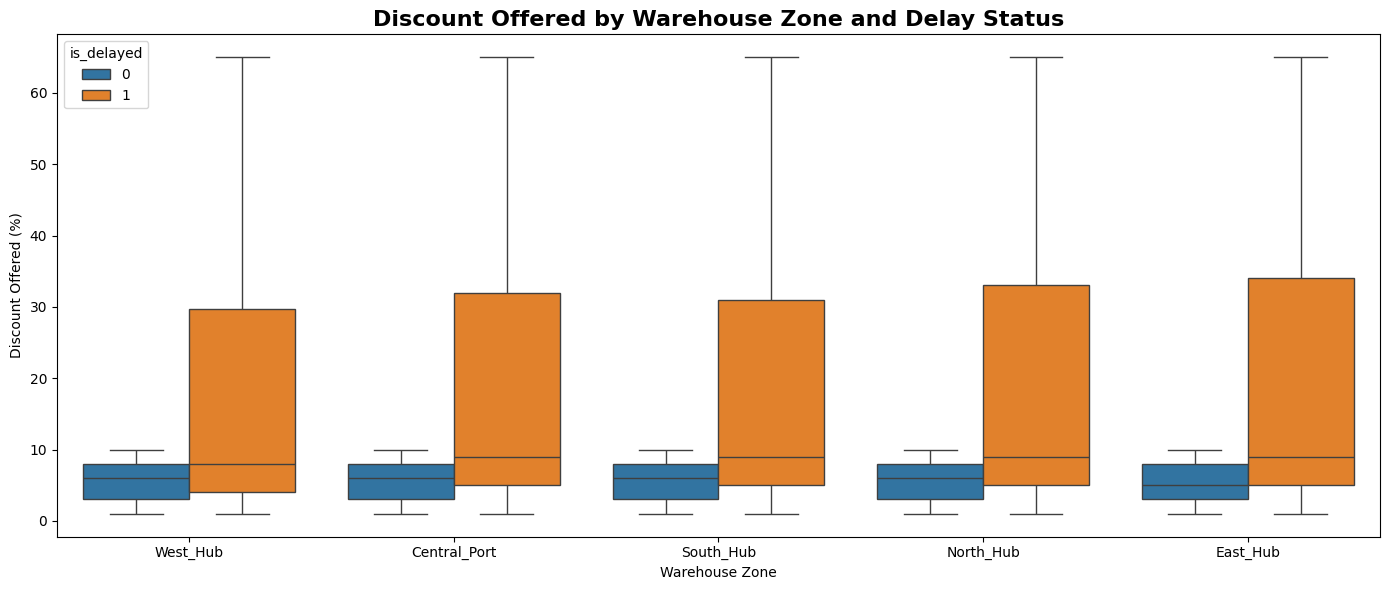

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Warehouse_Zone', y='Discount_offered', hue='is_delayed')
plt.title('Discount Offered by Warehouse Zone and Delay Status', fontsize=16, fontweight='bold')
plt.xlabel('Warehouse Zone')
plt.ylabel('Discount Offered (%)')
plt.tight_layout()
plt.show()

In [12]:
df['Weight_Bin'] = pd.cut(df['Product_Weight_g'], 
                           bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
                           labels=['0-1kg', '1-2kg', '2-3kg', '3-4kg', '4-5kg', '5-6kg', '6-7kg', '7-8kg'])

weight_stats = df.groupby('Weight_Bin').agg({
    'Tracking_ID': 'count',
    'Customer_Score': 'mean',
    'is_delayed': 'mean'
}).round(2)

weight_stats.columns = ['Number_of_Orders', 'Avg_Customer_Score', 'Delay_Rate']
weight_stats['Delay_Rate_%'] = (weight_stats['Delay_Rate'] * 100).round(1)

print("="*70)
print("ORDERS & SATISFACTION BY WEIGHT RANGE")
print("="*70)
print(weight_stats)

ORDERS & SATISFACTION BY WEIGHT RANGE
            Number_of_Orders  Avg_Customer_Score  Delay_Rate  Delay_Rate_%
Weight_Bin                                                                
0-1kg                      0                 NaN         NaN           NaN
1-2kg                   2592                2.99        0.67          67.0
2-3kg                    740                3.06        1.00         100.0
3-4kg                    711                3.04        1.00         100.0
4-5kg                   2457                3.02        0.44          44.0
5-6kg                   2293                2.95        0.43          43.0
6-7kg                      2                2.00        1.00         100.0
7-8kg                      4                3.50        1.00         100.0


/var/folders/fc/vnwwcy2936zgzlbdjmf096r80000gn/T/ipykernel_10360/1366551762.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_stats = df.groupby('Weight_Bin').agg({


## Phase 2: Feature Engineering & Baseline
Prepare the data for Machine Learning.

In [13]:
df['is_problem_weight'] = ((df['Product_Weight_g'] >= 2000) & (df['Product_Weight_g'] < 4000)) | (df['Product_Weight_g'] >= 6000)
df['is_problem_weight'] = df['is_problem_weight'].astype(int)

In [14]:
median_discount = df['Discount_offered'].median()
df['high_discount'] = (df['Discount_offered'] > median_discount).astype(int)

df['problem_weight_high_discount'] = df['is_problem_weight'] * df['high_discount']

In [15]:
print(f"\nProblem weight orders: {df['is_problem_weight'].sum()} ({df['is_problem_weight'].mean()*100:.1f}%)")
print(f"High discount orders: {df['high_discount'].sum()} ({df['high_discount'].mean()*100:.1f}%)")


Problem weight orders: 1461 (16.6%)
High discount orders: 4149 (47.2%)


In [16]:
from sklearn.preprocessing import LabelEncoder

print("\nEncoding categorical variables:")
le_warehouse = LabelEncoder()
le_mode = LabelEncoder()
le_priority = LabelEncoder()
le_gender = LabelEncoder()

df['Warehouse_Zone_encoded'] = le_warehouse.fit_transform(df['Warehouse_Zone'])
df['Mode_of_Shipment_encoded'] = le_mode.fit_transform(df['Mode_of_Shipment'])
df['Product_Priority_encoded'] = le_priority.fit_transform(df['Product_Priority'])
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])

print("\n5. Encoded Variables:")
print(f"   - Warehouse_Zone: {df['Warehouse_Zone'].nunique()} categories")
print(f"   - Mode_of_Shipment: {df['Mode_of_Shipment'].nunique()} categories")
print(f"   - Product_Priority: {df['Product_Priority'].nunique()} categories")
print(f"   - Gender: {df['Gender'].nunique()} categories")

ModuleNotFoundError: No module named 'sklearn'

## Phase 3: Training, Evaluation & Strategy
Build your solution and define your business interventions.

* **Step 3.1:** Train a Classifier.
* **Step 3.2:** Generate a Classification Report and Confusion Matrix.
* **Step 3.3:** **CRITICAL:** List 3 business solution will save our customers based on your model (you can use a 5% Coupon).

In [ ]:
# Model training and evaluation code here


### 📝 Business Strategy Recommendations
1. 
2. 
3. 

## Phase 4: The Business Value Calculator
Calculate the SAR impact of your model using the following values:
* **+ SAR 75.00**: True Positive (Saved Customer)
* **- SAR 18.75**: False Positive (5% Wasted Coupon)
* **- SAR 187.50**: False Negative (Lost Lifetime Value)

In [ ]:
# Calculate and print the Total Business Value in SAR
